In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium 
import shapely
from shapely import points
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import warnings
import geopandas as gpd
warnings.filterwarnings("ignore")

In [2]:
# READING THE DATAFRAMES IN THE NOTEBOOK USING .READ_CSV FOR CSV FILES AND .READ_FILE FOR .SHAPEFILE

df_0414 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-apr14.csv")
df_0514 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-may14.csv")
df_0614 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-jun14.csv")
df_2015 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-janjune-15.csv")
geo_df = gpd.read_file(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\NYC Taxi Zones\geo_export_70ae9294-3624-4270-b277-a9eead8a9542.shp")



In [3]:
# CHECK THE DATA FRAMES AFTER BEEN READ IN - PRINT OUT THE DATA FRAMES USING PRINT() 
 
print(df_0414.head())
print('-'*50)
print(df_0514.head()) 
print('-'*50)
print(df_0614.head())
print('-'*50)
print(df_2015.head())
print('-'*50)
print(geo_df.head())

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
--------------------------------------------------
          Date/Time      Lat      Lon    Base
0  5/1/2014 0:02:00  40.7521 -73.9914  B02512
1  5/1/2014 0:06:00  40.6965 -73.9715  B02512
2  5/1/2014 0:15:00  40.7464 -73.9838  B02512
3  5/1/2014 0:17:00  40.7463 -74.0011  B02512
4  5/1/2014 0:17:00  40.7594 -73.9734  B02512
--------------------------------------------------
          Date/Time      Lat      Lon    Base
0  6/1/2014 0:00:00  40.7293 -73.9920  B02512
1  6/1/2014 0:01:00  40.7131 -74.0097  B02512
2  6/1/2014 0:04:00  40.3461 -74.6610  B02512
3  6/1/2014 0:04:00  40.7555 -73.9833  B02512
4  6/1/2014 0:07:00  40.6880 -74.1831  B02512
--------------------------------------------------
  Dispatching_base_

In [4]:
# CHECKING THE THE SHAPE OF THE IMPORTED DATAFRAMES

print(df_0414.shape)
print('-'*50)
print(df_0514.shape)
print('-'*50)
print(df_0614.shape)
print('-'*50)
print(df_2015.shape)
print('-'*50)
print(geo_df.shape)

(564516, 4)
--------------------------------------------------
(652435, 4)
--------------------------------------------------
(663844, 4)
--------------------------------------------------
(14270479, 4)
--------------------------------------------------
(263, 7)


In [5]:
# CREATING AND CLEANING THE DF_2014 DATAFRAME

# Creating and merging the original dataframes into a new dataframe called 'df_2014'
df_2014 = pd.DataFrame() # Creating an empty dataframe called 'df_2014' 
df_2014 = pd.concat([df_0414, df_0514 ,df_0614, df_2014]) # Using concat to merge the 3 data frames in one called 'df_2014'
df_2014.shape # Checking the length of the data frame once merged

# CHECKING FOR DUPLICATED VALUES: 
df_2014.head()
df_2014.duplicated().sum() # CHECKING HOW MANY DUPLICATE VALUES ARE IN THE NEW DATAFRAME
df_2014.drop_duplicates(inplace = True) #DROPPING DUPLICATE VALUES IN DATAFRAME
df_2014.shape # CHECKING DUPLICATE VALUES HAVE BEEN REMOVED FROM DATAFRAME

# CHECKING DATAFRAME FOR NULL VALUES 
df_2014.isnull().sum() # NO NULL CALUES PRESENT IN THE DATAFRAME 

# CHECKING DATATYPES OF DATAFRAME: 
df_2014.dtypes # Date/Time needs to be a date/time datatype (not a string) 

# CONVERTING THE DATE/TIME COLUMN FROM STRING INTO A DATE/TIME DATA TYPE
df_2014['Date/Time'] = pd.to_datetime(df_2014['Date/Time']) #Overwrite the original datatype as a datetime

# CREATING AN HOUR COLUMN IN DATAFRAME
df_2014['hour'] = df_2014['Date/Time'].dt.hour

# CONVERTING DATETIME INTO DAY_NAME: 
df_2014['day_name'] = df_2014['Date/Time'].dt.day_name()

# CONVERTING DATETIME INTO DAY: 
df_2014['day'] = df_2014['Date/Time'].dt.day

# CONVERTING DATETIME INTO MONTH: 
df_2014['month'] = df_2014['Date/Time'].dt.month

# RENAMING COLUMNS INTO LOWERCASE AND WITHOUT SPACES:
df_2014.rename({'Date/Time': 'date_time', 'Lat':'lat', 'Lon':'lon', 'Base':'base', 'Hours':'hour'}, axis = 1, inplace = True)

# REINDEX COLUMNS OF THE DATAFRAME: 
df_2014 = df_2014.reindex(['date_time', 'month', 'day', 'day_name', 'hour', 'base', 'lat', 'lon'], axis = 1)

# CHECK FINAL df_2014 AFTER CLEANING: 

print(df_2014.head(2))
print('-'*50)
print(df_2014.tail(2))
print('-'*50)
print(df_2014.sample(2))
print('-'*50)
print(df_2014.columns)
print('-'*50)
print(df_2014.dtypes)
print('-'*50)
print(df_2014.describe())
print('-'*50)
print(df_2014.info)

In [124]:
# DROPPING UNWANTED COLUMNS FROM DATA FRAME: 
# df_2015.drop('Affiliated_base_num', axis = 1, inplace = True)

# SORT THE VALUES IN THE DATA FRAME BY DATE
df_2015 = df_2015.sort_values(by= 'date', ascending = True)

# RESETTING INDEX OF DATAFRAME AFTER ORDER THE DATAFRAME BY DATE: 
df_2015.reset_index(0, inplace= True)

# DROPPING THE INDEX COLUMN FROM THE DATAFRAME: 
df_2015.drop(['index'], axis = 1, inplace = True)

# CHANGING THE DATE COLUMN TO A DATETIME FORMAT: 
df_2015['date'] = pd.to_datetime(df_2015['date'])

# EXTRACTING MONTH NAME: 
df_2015['month'] = df_2015['date'].dt.month_name()

# EXTRACTING DAY_NAME: 
df_2015['day_name'] = df_2015['date'].dt.day_name()

# EXTRACTING HOUR: 
df_2015['hour'] = df_2015['date'].dt.hour

# EXTRACTING DAY: 
df_2015['day'] = df_2015['date'].dt.day

# DROPPING DUPLICATE VALUES: 
df_2015.drop_duplicates(inplace = True)

# CHECKING DATAFRAME FOR NULL VALUES: 
df_2015.isnull().sum()

# Rename the columns of the dataframe:
df_2015 = df_2015.rename({'Dispatching_base_num':'base', 'Pickup_date':'date','locationID':'location_id'}, axis = 1)

# RE-INDEXING COLUMNS FOR THE DATAFRAME AFTER ADDING ADDITIONAL COLUMNS:
df_2015 = df_2015.reindex(['date', 'month', 'day', 'day_name', 'hour', 'base_number', 'location_id'], axis = 1)

# EXTRACT THE MONTHS OF THE DIFFERENT QUARTERS: 
df_15Q1 = df_2015.query('`month` == ["January","February","March"]') # FIRST QUARTER
df_15Q2 = df_2015.query('`month` == ["April","May","June"]') # SECOND QUARTER

#CHECK THE FINAL DATAFRAMES CREATED: 
print(df_15Q1)
print('-'*50)
print(df_15Q2)

                       date    month  day  day_name  hour base_number  \
0       2015-01-01 00:00:05  January    1  Thursday     0      B02764   
1       2015-01-01 00:00:05  January    1  Thursday     0      B02598   
2       2015-01-01 00:00:08  January    1  Thursday     0      B02682   
3       2015-01-01 00:00:11  January    1  Thursday     0      B02682   
4       2015-01-01 00:00:13  January    1  Thursday     0      B02764   
...                     ...      ...  ...       ...   ...         ...   
6078904 2015-03-31 23:59:00    March   31   Tuesday    23      B02764   
6078905 2015-03-31 23:59:00    March   31   Tuesday    23      B02764   
6078906 2015-03-31 23:59:00    March   31   Tuesday    23      B02765   
6078907 2015-03-31 23:59:00    March   31   Tuesday    23      B02764   
6078908 2015-03-31 23:59:00    March   31   Tuesday    23      B02764   

         location_id  
0                255  
1                144  
2                113  
3                234  
4       

#### DATA ANALYSIS

##### LINE PLOT - AMOUNT OF PICK UPS - Q2 OF 2014

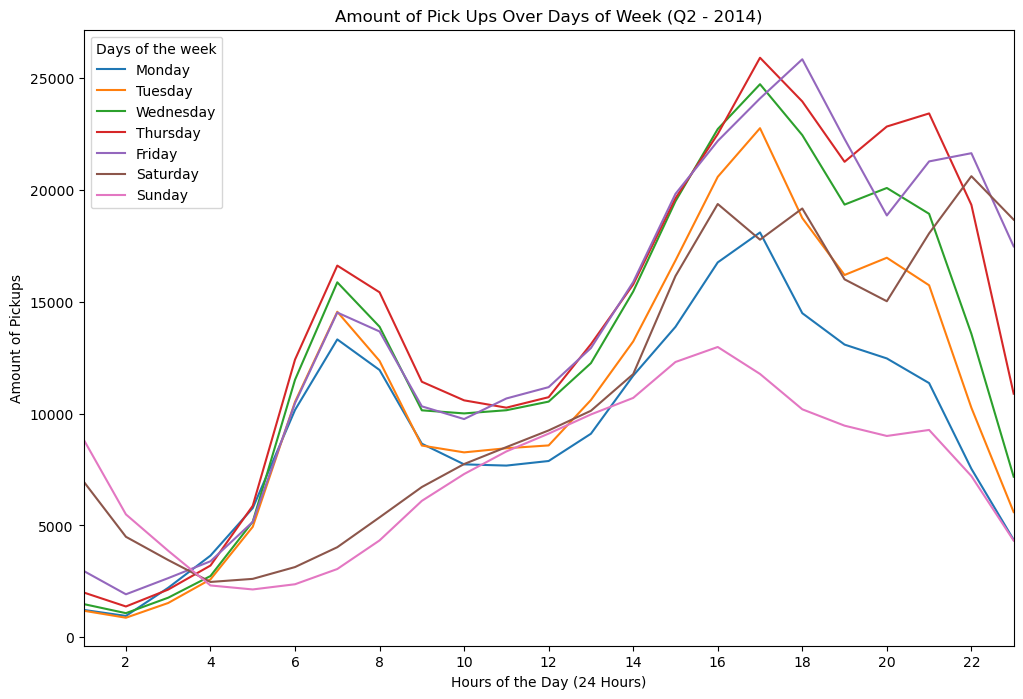

In [8]:
pvt_hourbyweek14 = df_2014.groupby(['hour','day_name']).size().unstack() # Creating a pivot table to hour and day name over a week
pvt_hourbyweek14_reindex = pvt_hourbyweek14.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) # Re-indexing the pivot table so the days of the week are in order

plt.figure(figsize=(12,8)) # Creating a figure for the plot
# Creating the line plot (including renaming the xlabel, ylabel, title, changing the X axis limit and X ticks labels)
sns.lineplot(data=pvt_hourbyweek14_reindex, dashes = False,).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups Over Days of Week (Q2 - 2014)",  xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22]);  
plt.legend(title="Days of the week") # Adding a legend to the line plot with the days on the week
plt.show() # Using .show() to show the plot in the notebook

##### LINE PLOT - AMOUNT OF PICK UPS - Q1 OF 2015

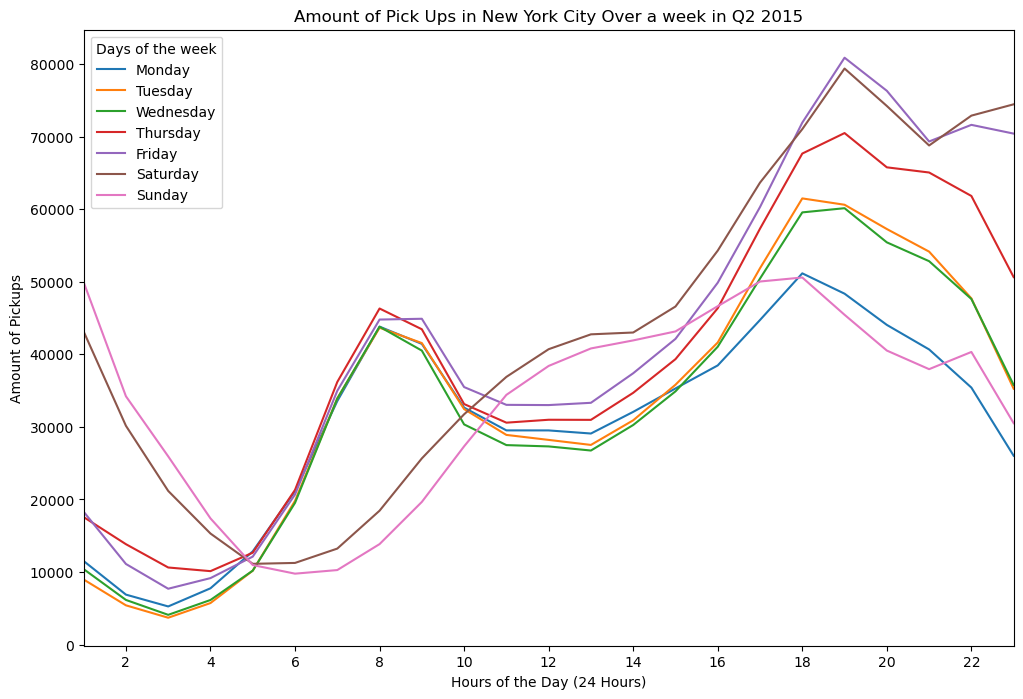

In [84]:
# CREATING A PIVOT TABLE FOR PLOTTING ON LINE CHART
pvt_q1days15 = df_15Q1.groupby(['hour','day_name']).size().unstack()
pvt_q1days15_r = pvt_q1days15.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#---------------------------------------------------------------------------------------------------------

# CREATING LINE PLOT FOR PICKUPS OVER THE WEEK - Q2 2015
plt.figure(figsize=(12,8)) # CREATING 
sns.lineplot(data=pvt_q1days15_r, dashes = False).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City Over a week in Q2 2015", xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22]);
plt.legend(title="Days of the week")
plt.show()

##### LINE PLOT - AMOUNT OF PICK UPS - Q2 OF 2015

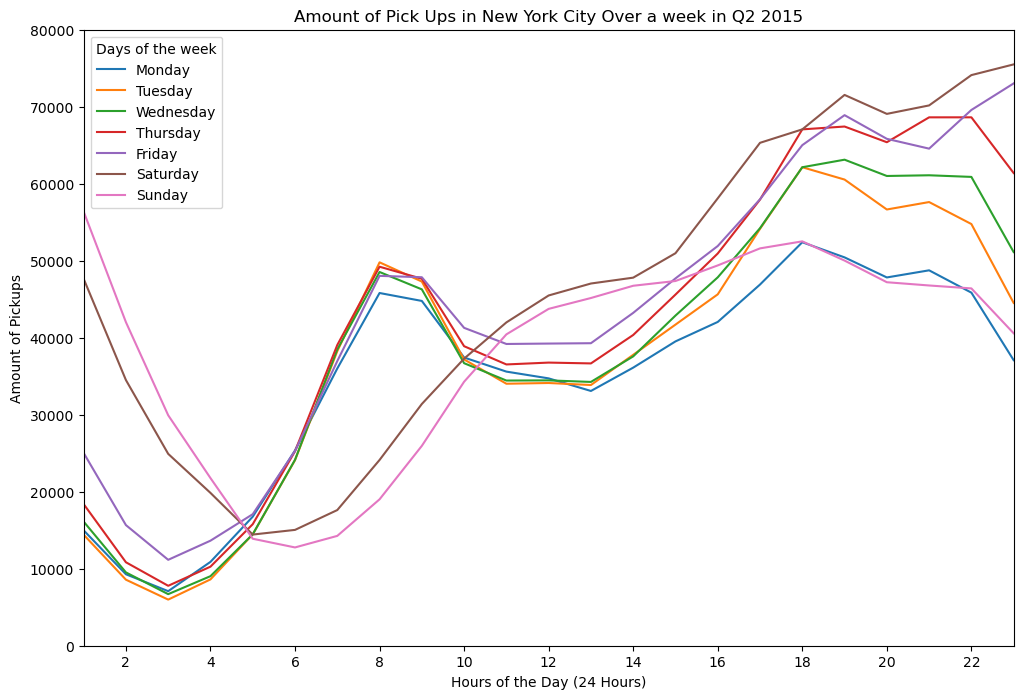

In [86]:
# CREATING A PIVOT TABLE FOR PLOTTING ON LINE CHART
pvt_q2days15 = df_15Q2.groupby(['hour','day_name']).size().unstack()
pvt_q2days15_r = pvt_q2days15.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#---------------------------------------------------------------------------------------------------------

# CREATING LINE PLOT FOR PICKUPS OVER THE WEEK - Q2 2015
plt.figure(figsize=(12,8)) # CREATING 
sns.lineplot(data=pvt_days15_r, dashes = False).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City Over a week in Q2 2015", xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22], ylim = (0,80000));
plt.legend(title="Days of the week")
plt.show()

### AMOUNT OF PICKUPS PER MONTH: 

##### BAR CHART - PICKUPS PER MONTH - Q2 2014 

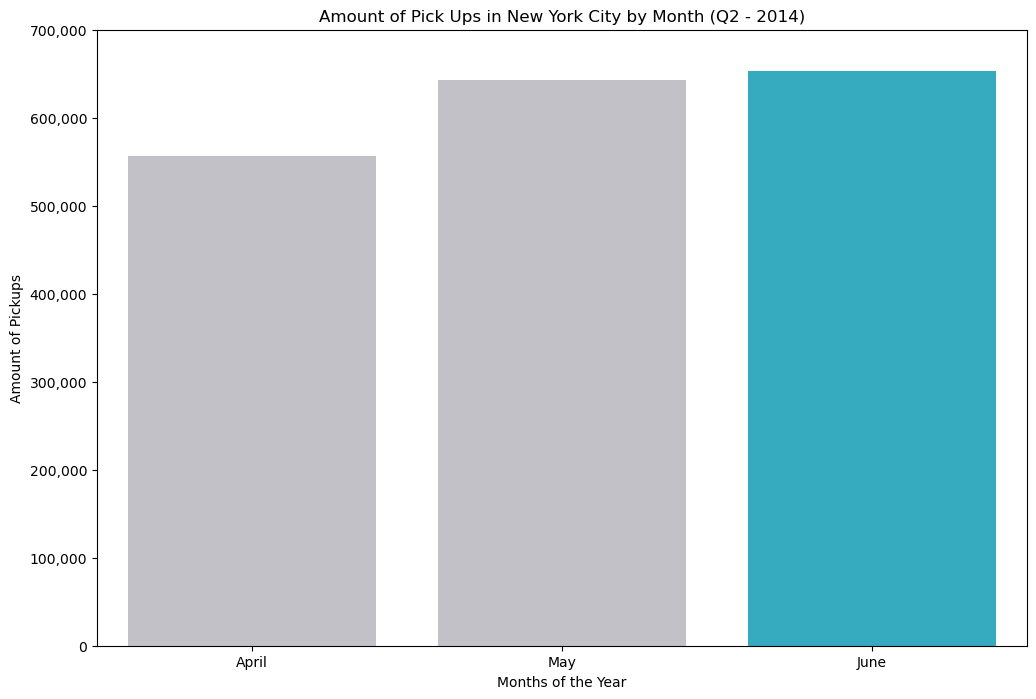

In [87]:
april_14 = df_2014.query('`month`== 4')
may_14 = df_2014.query('`month`== 5')
june_14 = df_2014.query('`month`== 6')

april_14_total = len(april_14)
may_14_total = len(may_14)
june_14_total = len(june_14)

data = {'Months' : ['April', 'May', 'June'],
        'Totals' : [april_14_total,  may_14_total,  june_14_total]}

months = pd.DataFrame(data)

#---------------------------------------------------------------------------------------------

# CREATING THE BAR PLOT 

x = months['Months'] # ASSIGNING MONTHS OF THE YEAR TO THE X AXIS
y = months['Totals'] # ASSIGNING TOTALS TO THE Y AXIS

custom_colours1 = ['#C0C0C8', '#C0C0C8', '#1fbad6'] # ADDING CUSTOM TO COLOURS TO THE GRAPH TO HIGHLIGHT MOST POPULAR MONTH

# CREATING THE BAR PLOT IN SEABORN
plt.figure(figsize=(12,8)) # CREATING THE CANVAS FOR THE PLOT 
sns.barplot(x = x, y = y, palette = custom_colours1).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q2 - 2014)", yticklabels = ['0', '100,000', '200,000', '300,000',  '400,000',  '500,000', '600,000', '700,000'], ylim = (0,700000));
plt.show() #

##### BAR CHART - PICKUPS PER MONTH - Q1 2015

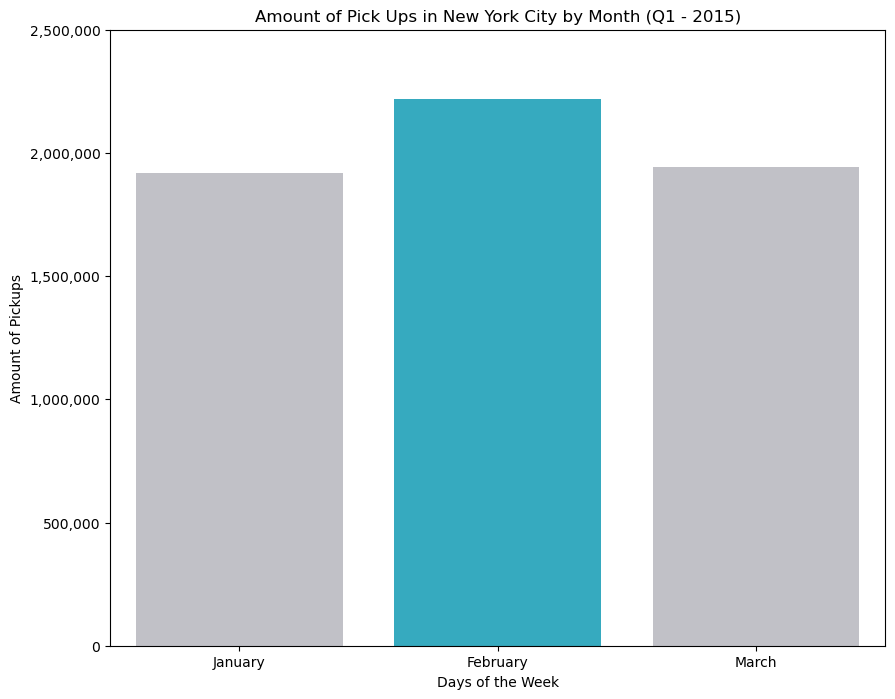

In [108]:
# FINDING THE MOST POPULAR MONTH IN Q1 OF 2015

jan_15 = len(df_15Q1.query('`month` == "January"'))
feb_15 = len(df_15Q1.query('`month` == "February"'))
mar_15 = len(df_15Q1.query('`month` == "March"'))

#----------------------------------------------

# CREATING THE MOST POPULAR MONTH IN Q1 OF 2015 

q115_month = {
    'month': ['January', 'February', 'March'],
    'count': [jan_15, feb_15, mar_15],
}

# Convert data to a DataFrame
q1_15_month  = pd.DataFrame(q115_month)

#----------------------------------------------

# CREATING X AND Y AXIS FOR PLOT

x5 = q1_15_month['month']
y5 = q1_15_month['count']

#----------------------------------------------

#CREATING A BARPLOT

custom_q15 = ['#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = x5, y = y5, palette=custom_q15).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q1 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

##### BAR CHART - PICKUPS PER MONTH - Q2 2015

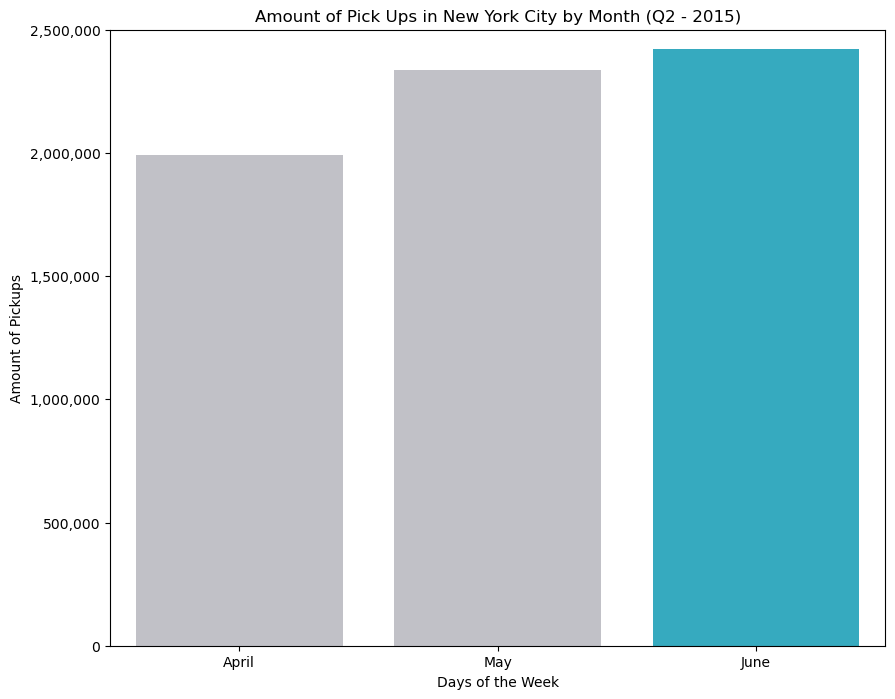

In [119]:
#FIND MOST POPULAR MONTH OF Q2 OF 2015 FOR PICKUPS

apr_15 = len(df_15Q2.query('`month` == "April"'))
may_15 = len(df_15Q2.query('`month` == "May"'))
jun_15 = len(df_15Q2.query('`month` == "June"'))

#-----------------------------------------------------
#CREATING TABLE OF MOST POPULAR MONTH OF Q2 OF 2015 FOR PICKUPS

pop_month = {
    'month': ['April', 'May', 'June'],
    'count': [apr_15, may_15, jun_15],
}

# Convert data to a DataFrame
most_pop_month = pd.DataFrame(pop_month)

#-----------------------------------------------------

# CREATING X AND Y AXIS FOR PLOT
x7 = most_pop_month['month']
y7 = most_pop_month['count']

#-----------------------------------------------------

# CREATING PLOT 
custom_colours7 = ['#c0c0c8', '#c0c0c8', '#1fbad6']

plt.figure(figsize= (10,8))
sns.barplot(x = x7, y = y7, palette=custom_colours7).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q2 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

### MOST POPULAR DAY FOR PICKUPS 


#### Q2 -2014 

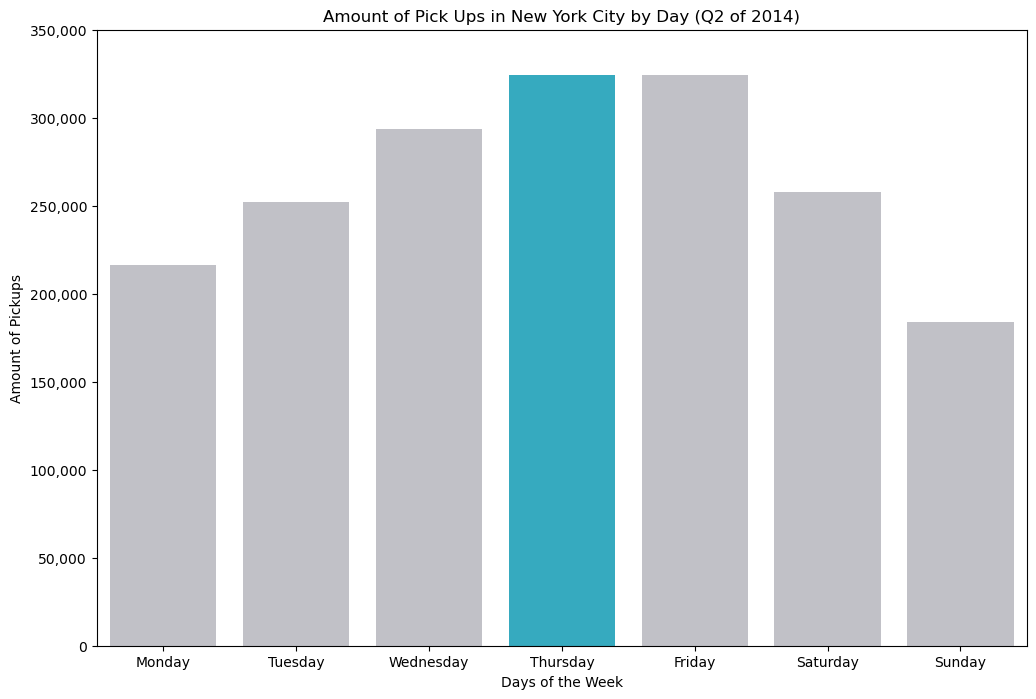

In [211]:
# FIDNING THE MOST POPULAR DAY IN Q2 OF 2014

mon_14 = df_2014.query('`day_name` == "Monday"').value_counts().sum()
tue_14 = df_2014.query('`day_name` == "Tuesday"').value_counts().sum()
wed_14 = df_2014.query('`day_name` == "Wednesday"').value_counts().sum()
thu_14 = df_2014.query('`day_name` == "Thursday"').value_counts().sum()
fri_14 = df_2014.query('`day_name` == "Friday"').value_counts().sum()
sat_14 = df_2014.query('`day_name` == "Saturday"').value_counts().sum()
sun_14 = df_2014.query('`day_name` == "Sunday"').value_counts().sum()

#-----------------------------------------------------------------------------------------

# CREATING A TABLE FOR THE MOST POPULAR DAY IN Q2 OF 2014
day14 = {'Day' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        'Totals' : [mon_14, tue_14, wed_14,  thu_14,  fri_14, sat_14, sun_14]}

days_14 = pd.DataFrame(day14)

#-----------------------------------------------------------------------------------------

# CREATING THE X AND Y AXIS FOR PLOT 
x2 = days_14['Day']
y2 = days_14['Totals']


#CREATING THE BAR PLOT 

custom_colours2 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6', '#c0c0c8', '#c0c0c8', '#c0c0c8']

plt.figure(figsize= (12,8))
sns.barplot(x = x2, y = y2, palette = custom_colours2).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q2 of 2014)", yticklabels = ['0', '50,000', '100,000', '150,000', '200,000', '250,000', '300,000', '350,000',], ylim = (0,350000));
plt.show()


#### Q1 -2015

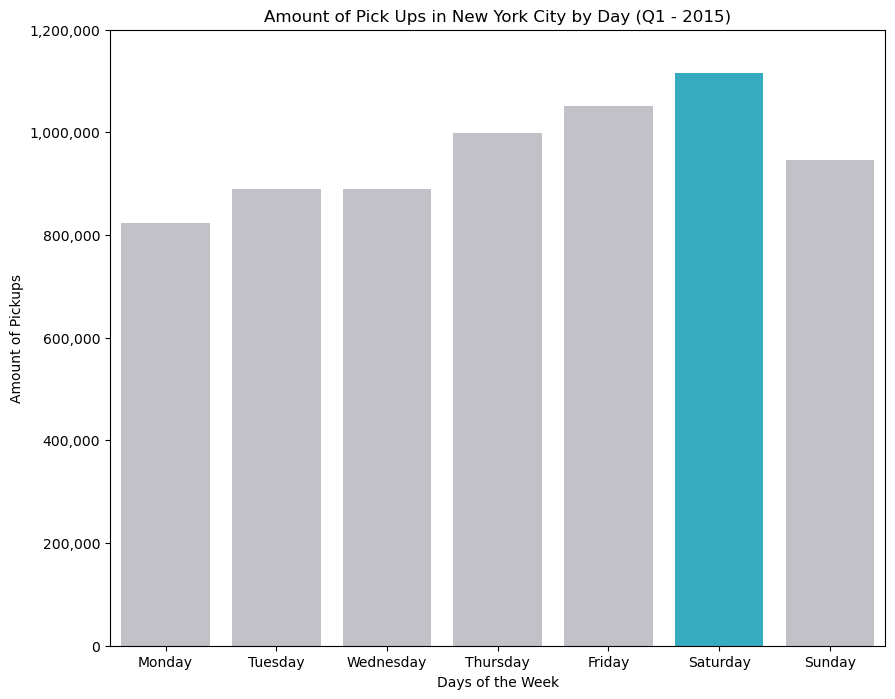

In [127]:
# CALCULATING MOST POPULAR DAY OF THE QUARTER FOR PICK UPS

mon_15 = len(df_15Q1.query('`day_name` == "Monday"'))
tues_15 = len(df_15Q1.query('`day_name` == "Tuesday"'))
wed_15 = len(df_15Q1.query('`day_name` == "Tuesday"'))
thur_15 = len(df_15Q1.query('`day_name` == "Thursday"')) 
fri_15 = len(df_15Q1.query('`day_name` == "Friday"'))
sat_15 = len(df_15Q1.query('`day_name` == "Saturday"')) 
sun_15 = len(df_15Q1.query('`day_name` == "Sunday"'))

# Creating a data frame for the most popular weekday for pick ups

day_of_week15 = {
    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'count': [mon15, tues15, wed15, thur15, fri15, sat15, sun15],
}

# Convert data to a DataFrame
most_pop_day15 = pd.DataFrame(day_of_week15)

#---------------------------------------------------------------------------------

# CREATING AXISES FOR PLOTTING THE BAR CHART
x8 = most_pop_day15['day_of_week']
y8 = most_pop_day15['count']

#---------------------------------------------------------------------------------

# CREATING THE BAR CHART IN SEABORN
custom_colours6 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = x4, y = y4, palette = custom_colours6).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q1 - 2015)", yticklabels = ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', ], ylim = (0,1200000));
plt.show()

#### Q2 -2015

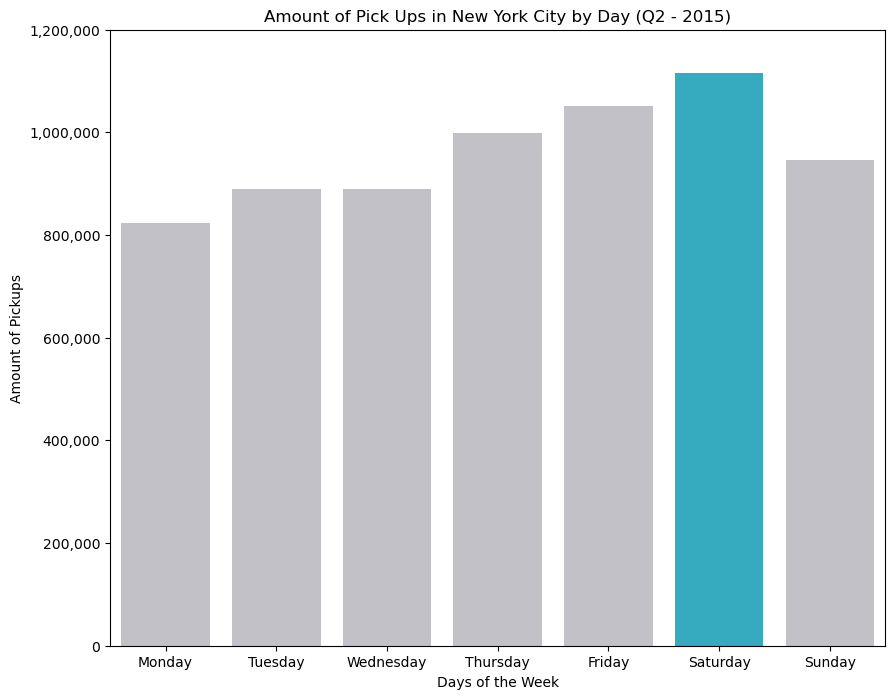

In [123]:
# CALCULATING MOST POPULAR DAY OF THE QUARTER FOR PICK UPS

mon15 = len(df_15Q2.query('`day_name` == "Monday"'))
tues15 = len(df_15Q2.query('`day_name` == "Tuesday"'))
wed15 = len(df_15Q2.query('`day_name` == "Tuesday"'))
thur15 = len(df_15Q2.query('`day_name` == "Thursday"')) 
fri15 = len(df_15Q2.query('`day_name` == "Friday"'))
sat15 = len(df_15Q2.query('`day_name` == "Saturday"')) 
sun15 = len(df_15Q2.query('`day_name` == "Sunday"'))

# Creating a data frame for the most popular weekday for pick ups

day_of_week = {
    'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'count': [mon15, tues15, wed15, thur15, fri15, sat15, sun15],
}

# Convert data to a DataFrame
most_pop_day = pd.DataFrame(day_of_week)

#---------------------------------------------------------------------------------

# CREATING AXISES FOR PLOTTING THE BAR CHART
x4 = most_pop_day['day_of_week']
y4 = most_pop_day['count']

#---------------------------------------------------------------------------------

# CREATING THE BAR CHART IN SEABORN
custom_colours6 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = x4, y = y4, palette = custom_colours6).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q2 - 2015)", yticklabels = ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', ], ylim = (0,1200000));
plt.show()

### MOST POPULAR BASE

#### Q2 -2014


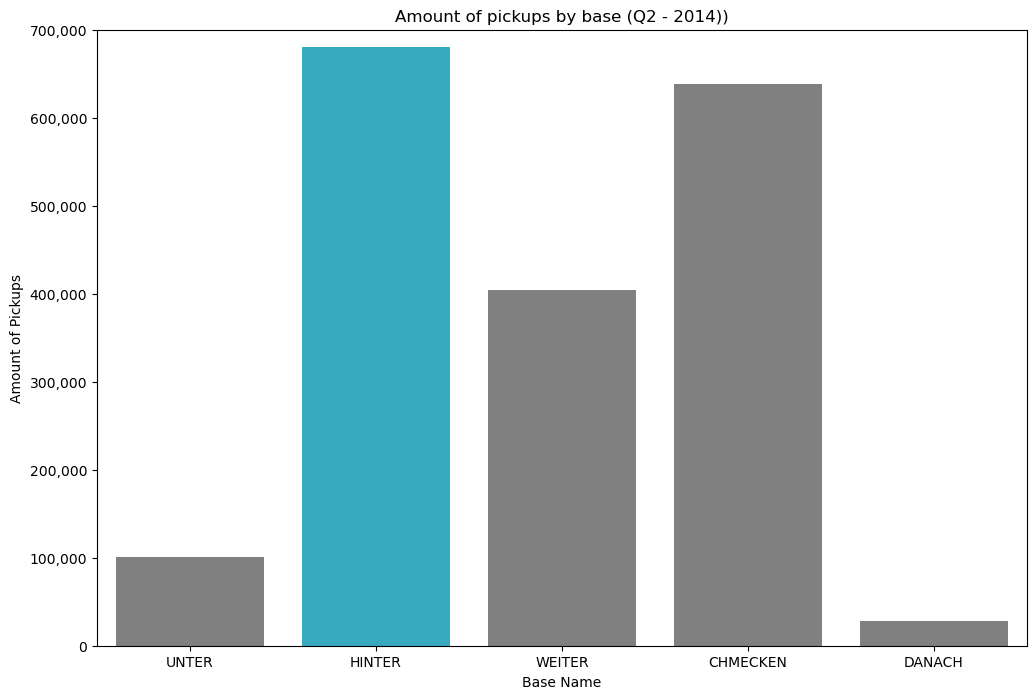

In [140]:
# Checking the Unique values of the dataframe
df_2014['base'].unique()

#---------------------------------------------
# Finding values for each base in the Q2 2014 Dataset

base_1 = df_2014.query('`base` == "B02512"').value_counts().sum() # BASE NAME = UNTER - 40.75258189875482, -74.0065557551885
base_2 = df_2014.query('`base` == "B02598"').value_counts().sum() # BASE NAME = HINTER - 40.75258189875482, -74.0065557551885
base_3 = df_2014.query('`base` == "B02617"').value_counts().sum() # BASE NAME = WEITER - 40.75258189875482, -74.0065557551885
base_4 = df_2014.query('`base` == "B02682"').value_counts().sum() # BASE NAME = SCHMECKEN - 40.75258189875482, -74.0065557551885
base_5 = df_2014.query('`base` == "B02764"').value_counts().sum() # BASE NAME = DANACH - NY - 40.75258189875482, -74.0065557551885

#--------------------------------------------
# CREATING DATAFRAME WITH NEW CREATED VALUES FOR PLOTTING

base14 = {'Base' : ['UNTER', 'HINTER', 'WEITER', 'CHMECKEN', 'DANACH'],
        'Totals' : [base_1, base_2, base_3,  base_4,  base_5]}

base14total = pd.DataFrame(base14)

#---------------------------------------------
# MAPPING X AND Y AXIS TO BAR PLOT 

x1 = base14total['Base']
y1 = base14total['Totals']

# CREATING BARPLOT IN SEABORN 
custom_colour3 = ['grey' , '#1fbad6', 'grey', 'grey', 'grey'] # CUSTOM COLOURS TO HIGHLIGHT STAND OUT BASE FOR THE QUARTER

plt.figure(figsize= (12,8))
sns.barplot(x = x1, y = y1, palette= custom_colour3).set(xlabel = "Base Name", ylabel = "Amount of Pickups", title = "Amount of pickups by base (Q2 - 2014))", yticklabels = ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000', '700,000', '800,000'], ylim = (0,700000));
plt.show()

#### Q1 -2015

In [167]:
df_15Q1['base_number'].unique()

array(['B02764', 'B02598', 'B02682', 'B02617', 'B02512', 'B02765'],
      dtype=object)

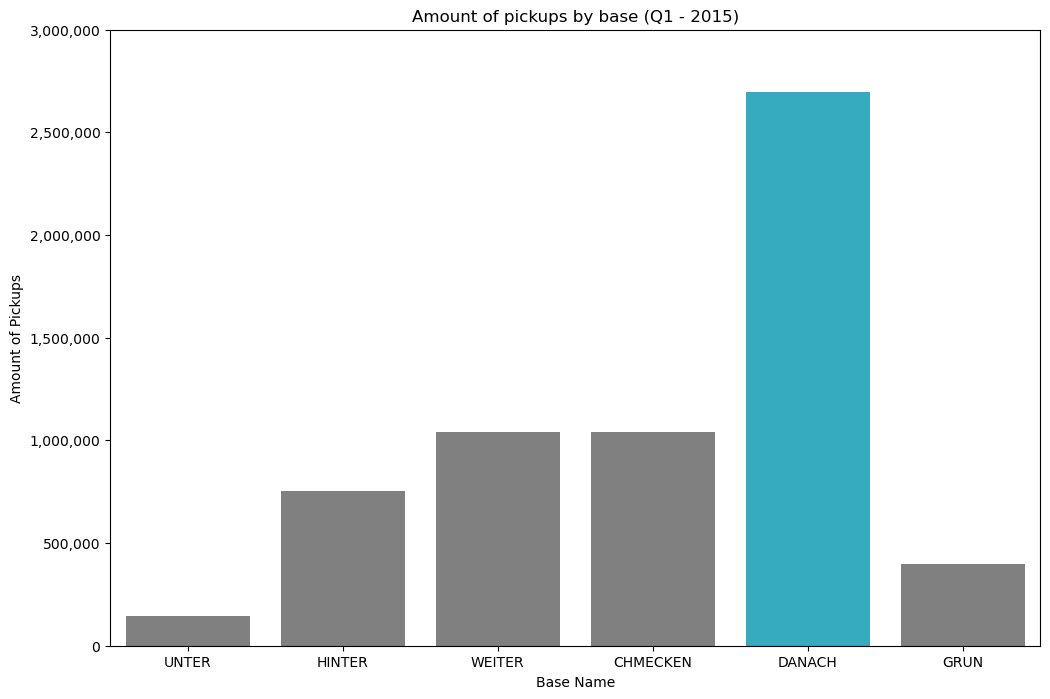

In [175]:
#BREAKDOWN OF EACH BASE DISPATCHES 
b_1 = df_15Q1.query('`base_number` == "B02512"').value_counts().sum() # BASE NAME = UNTER 
b_2 = df_15Q1.query('`base_number` == "B02598"').value_counts().sum() # BASE NAME = HINTER 
b_3 = df_15Q1.query('`base_number` == "B02617"').value_counts().sum() # BASE NAME = WEITER 
b_4 = df_15Q1.query('`base_number` == "B02682"').value_counts().sum() # BASE NAME = SCHMECKEN
b_5 = df_15Q1.query('`base_number` == "B02764"').value_counts().sum() # BASE NAME = DANACH - NY 
b_6 = df_15Q1.query('`base_number` == "B02765"').value_counts().sum() # BASE NAME = GRUN

#----------------------------------------------------------------------------------------

# CREATING THE NEW TABLE 
bases15 = {'Base' : ['UNTER', 'HINTER', 'WEITER', 'CHMECKEN', 'DANACH', 'GRUN'],
        'Totals' : [b_1, b_2, b_3,  b_4,  b_5,  b_6]}

bases_15 = pd.DataFrame(bases15)


#----------------------------------------------------------------------------------------

# CREATING THE X AND Y AXIS FOR PLOT
x15 = bases_15['Base']
y15 = bases_15['Totals']

#----------------------------------------------------------------------------------------

# CREATING PLOT
cc1 = ['grey' , 'grey' , 'grey' , 'grey' , '#1fbad6', 'grey' , 'grey' ,'grey']

plt.figure(figsize= (12,8))
sns.barplot(x = x15, y = y15, data = bases_15, palette = cc1).set(xlabel = "Base Name", ylabel = "Amount of Pickups", title = "Amount of pickups by base (Q1 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000'], yticks = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000], ylim = (0,3000000));
plt.show()

#### Q2 -2015

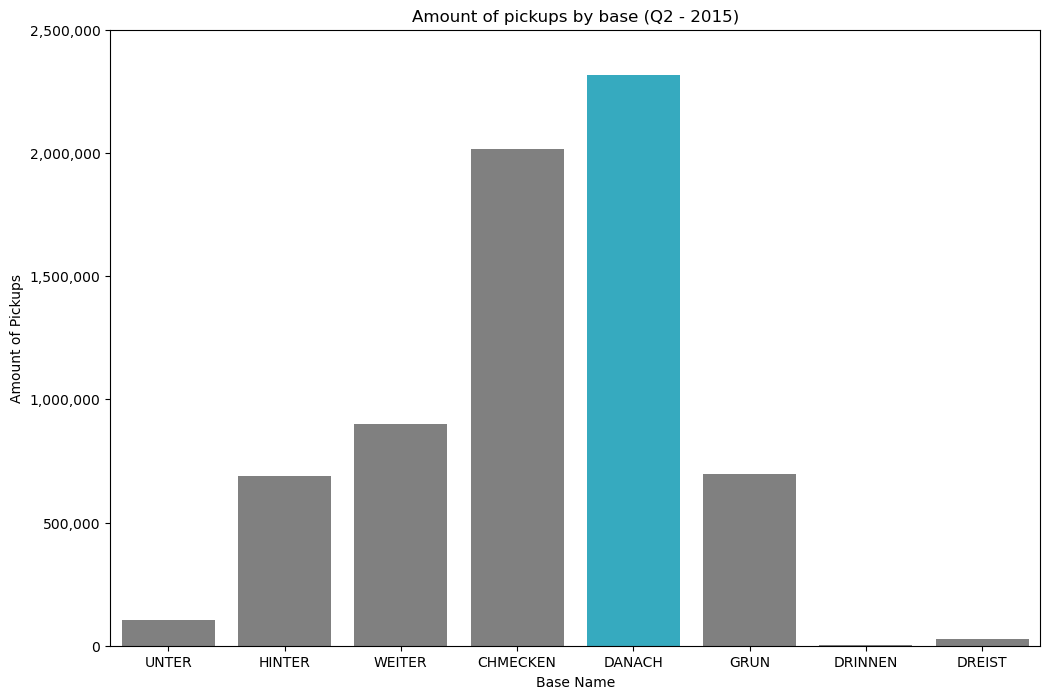

In [139]:
#BREAKDOWN OF EACH BASE DISPATCHES 
b1 = df_15Q2.query('`base_number` == "B02512"').value_counts().sum() # BASE NAME = UNTER 
b2 = df_15Q2.query('`base_number` == "B02598"').value_counts().sum() # BASE NAME = HINTER 
b3 = df_15Q2.query('`base_number` == "B02617"').value_counts().sum() # BASE NAME = WEITER 
b4 = df_15Q2.query('`base_number` == "B02682"').value_counts().sum() # BASE NAME = SCHMECKEN
b5 = df_15Q2.query('`base_number` == "B02764"').value_counts().sum() # BASE NAME = DANACH - NY 
b6 = df_15Q2.query('`base_number` == "B02765"').value_counts().sum() # BASE NAME = GRUN
b7 = df_15Q2.query('`base_number` == "B02836"').value_counts().sum() # BASE NAME = DRINNEN 
b8 = df_15Q2.query('`base_number` == "B02835"').value_counts().sum() # BASE NAME = DREIST 

#----------------------------------------------------------------------------------------

# CREATING THE NEW TABLE 
bases = {'Base' : ['UNTER', 'HINTER', 'WEITER', 'CHMECKEN', 'DANACH', 'GRUN', 'DRINNEN', 'DREIST'],
        'Totals' : [b1, b2, b3,  b4,  b5,  b6, b7, b8]}

bases15 = pd.DataFrame(bases)


#----------------------------------------------------------------------------------------

# CREATING THE X AND Y AXIS FOR PLOT
x151 = bases15['Base']
y151 = bases15['Totals']

#----------------------------------------------------------------------------------------

# CREATING PLOT
cc1 = ['grey' , 'grey' , 'grey' , 'grey' , '#1fbad6', 'grey' , 'grey' ,'grey']

plt.figure(figsize= (12,8))
sns.barplot(x = x151, y = y151, data = bases15, palette = cc1).set(xlabel = "Base Name", ylabel = "Amount of Pickups", title = "Amount of pickups by base (Q2 - 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000'], yticks = [0, 500000, 1000000, 1500000, 2000000, 2500000], ylim = (0,2500000));
plt.show()

##### PICK UP IN Q2 2014:

In [ ]:
# Creating a sample of the df_2014 dataframe to create the heatmap and cluster markers within Folium

pickups_14 = df_2014.sample(10000) # Create a new dataframe with a sample size of 10,000 rows.
pickups_14 = pickups_14.drop(['hour', 'day_name', 'base'], axis = 1) #Dropping unused columns for the heatmap and cluster map

#-------------------------------------------------------------------------------------------------

# Creating map plots
m = folium.Map(location = [40.7, -73.9], zoom_start = 9) # Importing the markers map from Folium 

pickups_14.duplicated().sum() # Checking if there are any duplicates.
pickups = pickups_14.drop_duplicates() # Removing the duplicates for the DataFrame.

pickups = pickups_14.dropna(how = 'all') #Dropping any na values from the Dataframe

#-------------------------------------------------------------------------------------------------

#Plotting the Cluster Markers on the Map using the MarkerCluster Plug-in

locations = list(zip(pickups['lat'], pickups['lon']))

marker_cluster = MarkerCluster(
    locations = locations,
    name="NYC UBER PICKUPS",
    palette = '1fbad6'
    )

marker_cluster.add_to(m);

m

In [ ]:
# Creating a Heatmap of the Q2 2014 Pick Up Data: 

pickups_mat14 = pickups[['lat', 'lon']].to_numpy() 
heat_m_14 = folium.Map(location = [40.7, -73.9], zoom_start = 8) # Importing the HeatMap from Folium and the New York City overlay
HeatMap(pickups_mat14).add_to(heat_m_14); # Adding the Lat,Lon Points to the Heatmap from Dataframe

heat_m_14 # To show heatmap

LINE PLOT PICK-UPS ON A MONTH BASIS - Q2 2014 / Q2 2015

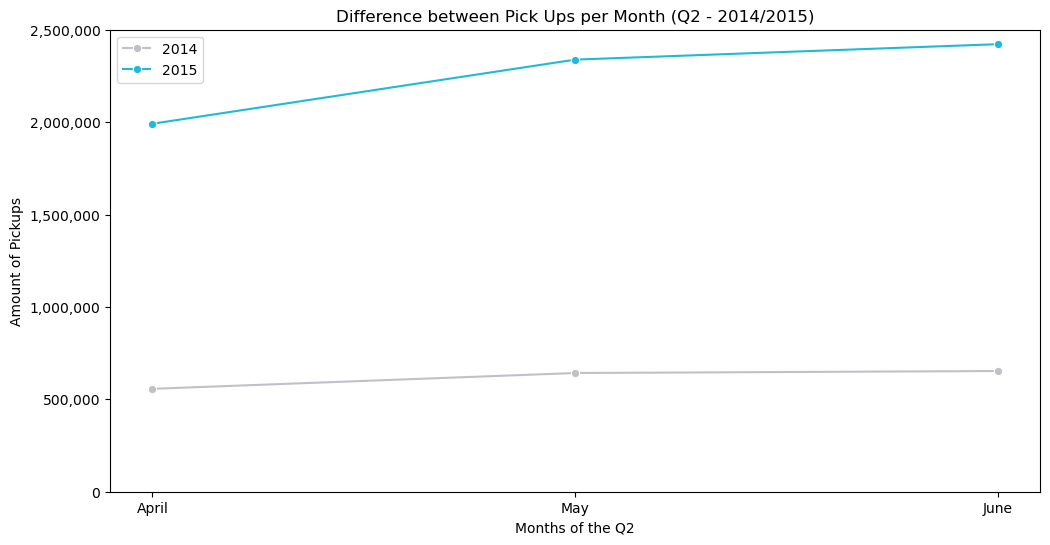

In [142]:
# CREATING NEW TABLE FOR PICKUPS OVER Q2 2014 / 2015

data_3 = {
    'month': ['April', 'May', 'June'],
    'count_14': [556767, 642360, 653158],
    'count_15': [apr_15, may_15, jun_15]
}

# -------------------------------------------------------------------------

# Convert data to a DataFrame
comp_month_graph = pd.DataFrame(data_3)

# -------------------------------------------------------------------------

#CREATING THE PLOT 

pickup = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000']
pickups = [0, 500000, 1000000, 1500000, 2000000, 2500000]
uber_blue = '#1fbad6'
uber_grey = '#c0c0c8'

plt.figure(figsize=(12, 6))
ax = sns.lineplot(x = comp_month_graph.month,  y=comp_month_graph['count_14'], data=comp_month_graph, label = '2014', marker = 'o', color = uber_grey).set()
ax = sns.lineplot(x = comp_month_graph.month,  y=comp_month_graph['count_15'], data=comp_month_graph, label = '2015', marker = 'o', color = uber_blue)
plt.title('Difference between Pick Ups per Month (Q2 - 2014/2015)')
plt.ylabel('Amount of Pickups')
plt.xlabel('Months of the Q2')
plt.yticks(pickups, pickup)
plt.ylim(0, 2500000)
plt.legend()
plt.show();


#### Q1/Q2 2015 - Most Popular Month

In [143]:
q1215_month = {
    'month': ['January', 'February', 'March','April', 'May', 'June'],
    'count': [jan_15, feb_15, mar_15, apr_15, may_15, jun_15],
}

# Convert data to a DataFrame
q12_15_month  = pd.DataFrame(q1215_month)

In [144]:
# CREATING TABLE FOR MOST POPULAR MONTH - Q1/Q2 2015

q1215_month = {
    'month': ['January', 'February', 'March','April', 'May', 'June'],
    'count': [jan_15, feb_15, mar_15, apr_15, may_15, jun_15],
}

# Convert data to a DataFrame
q12_15_month  = pd.DataFrame(q1215_month)

#------------------------------------------------------------------------

# CREATING X AND Y FOR PLOTS 
xd = q12_15_month['month']
yd = q12_15_month['count']

#------------------------------------------------------------------------

cc1 = ['#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#c0c0c8', '#1fbad6']


plt.figure(figsize= (10,8))
sns.barplot(x = xd, y = yd, palette = cc1).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month (Q1/Q2 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

#### HEATMAP BY DAY NUMBER AND HOUR - Q1 2015

In [149]:
q115_hour = df_15Q1.groupby(['hour','day']).size().unstack()

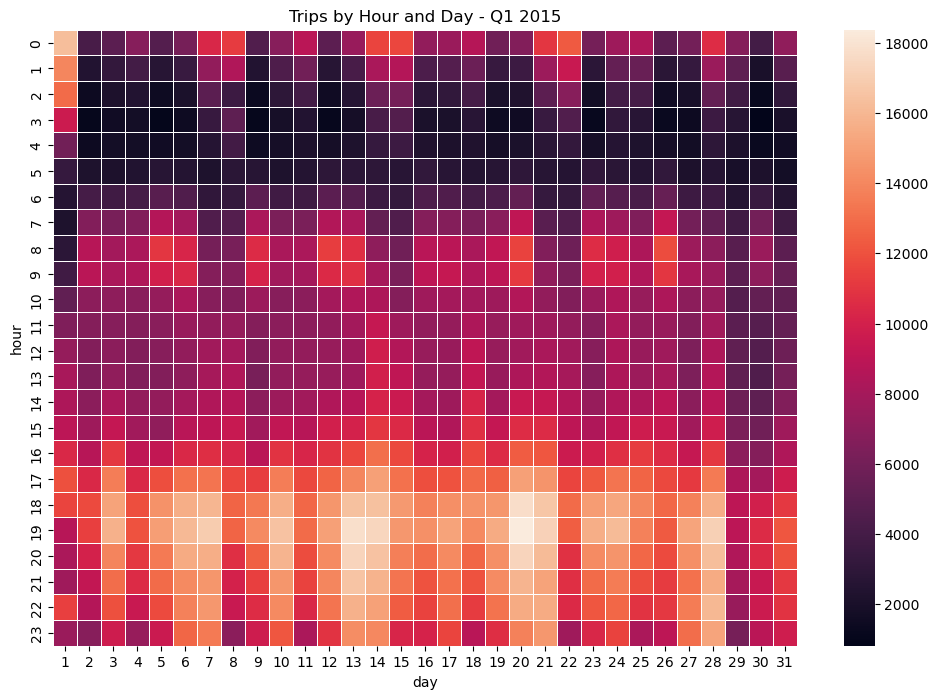

In [150]:
# Trips by Hour and Day - Q1 2015 

plt.figure(figsize = (12,8))

sns.heatmap(q115_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q1 2015")
plt.show()

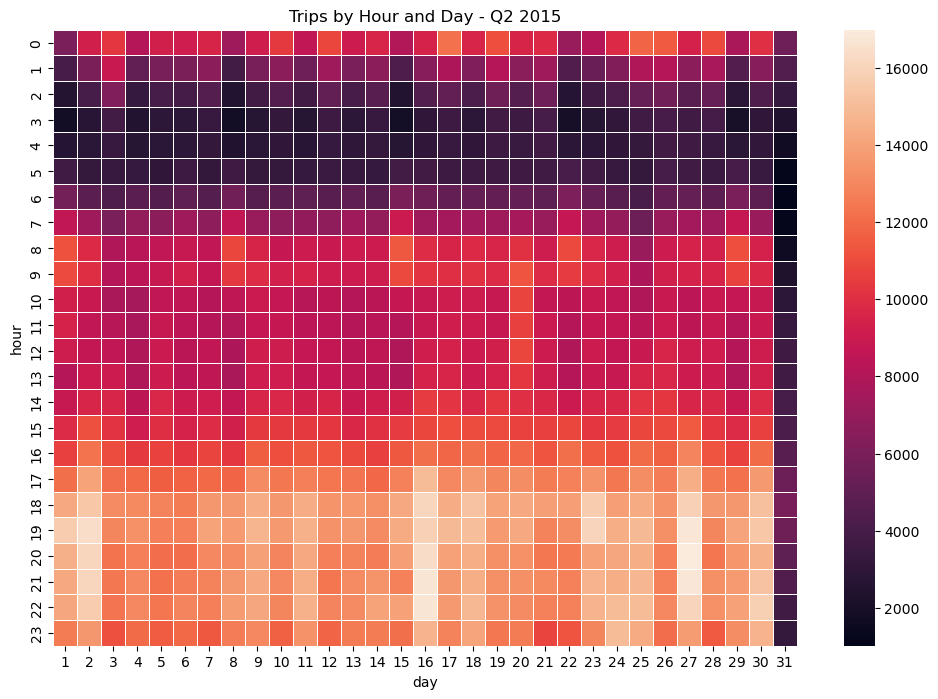

In [158]:
# Trips by Hour and Day - Q2 2015 

q215_hour = df_15Q2.groupby(['hour','day']).size().unstack()

plt.figure(figsize = (12,8))

sns.heatmap(q215_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q2 2015")
plt.show()

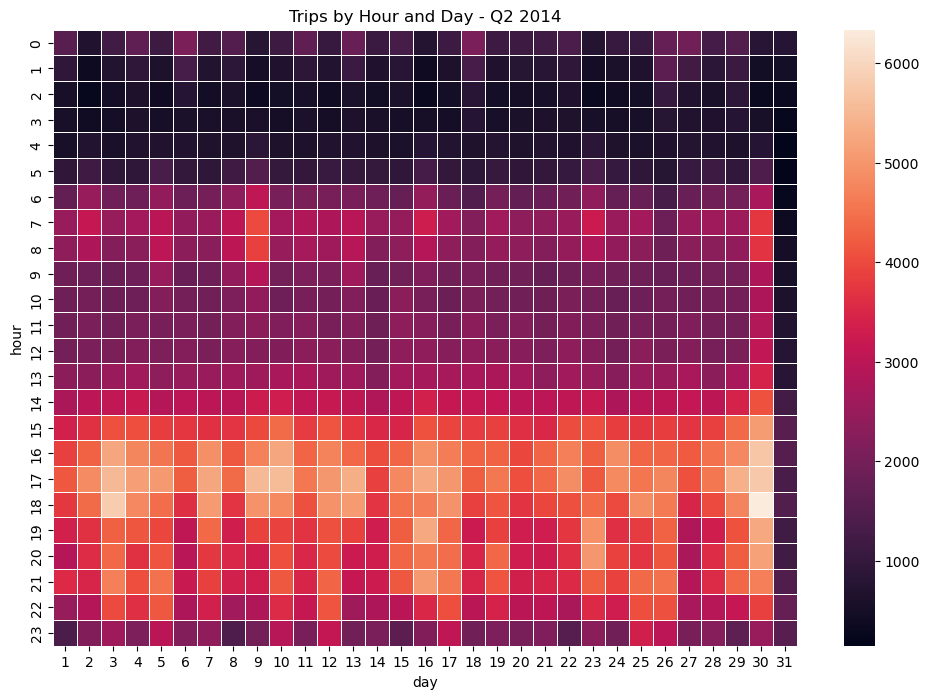

In [159]:
# Trips by Hour and Day - Q1 2014 

q14_hour = df_2014.groupby(['hour','day']).size().unstack()

plt.figure(figsize = (12,8))

sns.heatmap(q14_hour, linewidth = .5)
plt.title("Trips by Hour and Day - Q2 2014")
plt.show()

#### MOST POPULAR DAY - Q1/Q2 2015

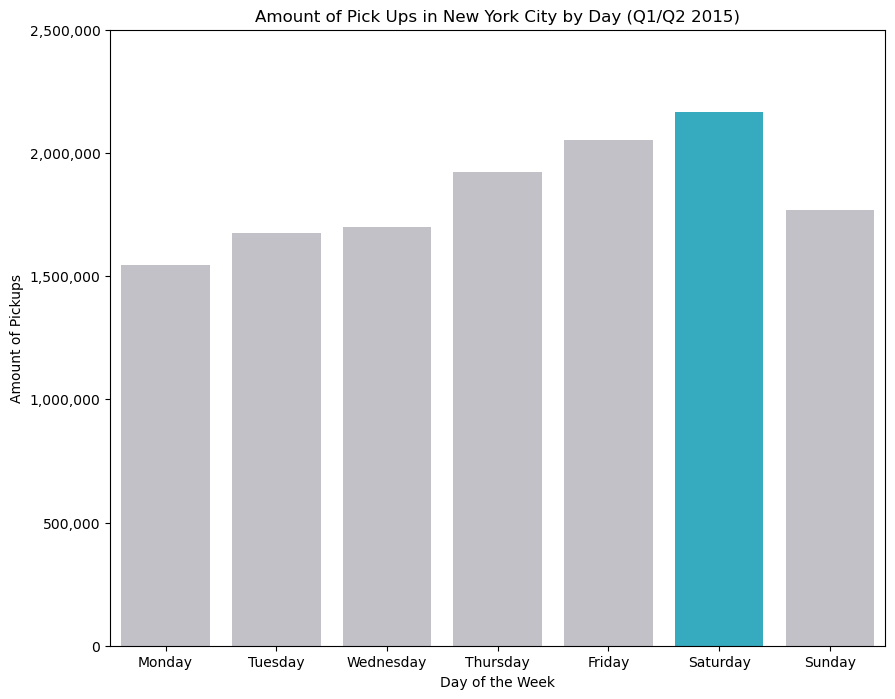

In [164]:
pop_mon= len(df_2015.query('`day_name` == "Monday"'))
pop_tues = len(df_2015.query('`day_name` == "Tuesday"'))
pop_wed = len(df_2015.query('`day_name` == "Wednesday"'))
pop_thurs = len(df_2015.query('`day_name` == "Thursday"'))
pop_fri = len(df_2015.query('`day_name` == "Friday"'))
pop_sat = len(df_2015.query('`day_name` == "Saturday"'))
pop_sun = len(df_2015.query('`day_name` == "Sunday"'))

#----------------------------------------------------------

day_2015 = {
    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'count': [pop_mon, pop_tues, pop_wed, pop_thurs, pop_fri, pop_sat, pop_sun],
}

# Convert data to a DataFrame
df_day_2015 = pd.DataFrame(day_2015)

#----------------------------------------------------------

x9 = df_day_2015['day']
y9 = df_day_2015['count']

#----------------------------------------------------------

cc_sat = ['#c0c0c8','#c0c0c8','#c0c0c8','#c0c0c8','#c0c0c8', '#1fbad6', '#c0c0c8']

plt.figure(figsize= (10,8))
sns.barplot(x = x9, y = y9, palette= cc_sat).set(xlabel = "Day of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day (Q1/Q2 2015)", yticklabels = ['0', '500,000', '1,000,000', '1,500,000', '2,000,000', '2,500,000', '3,000,000', ], ylim = (0,2500000));
plt.show()

#### CREATING A HEATMAP OF PICK UPS IN NEW YORK CITY 

MAPPING CLUSTERS - Q1 2015: 

In [1]:
geo_points = pd.DataFrame([geo_df['objectid'], geo_df['geometry'].centroid]).T

geo_points['lon'] = geo_points['Unnamed 0'].apply(lambda pt: pt.x)
geo_points['lat'] = geo_points['Unnamed 0'].apply(lambda pt: pt.y)

df_2015_merged = df_2015.merge(geo_points, left_on='location_id', right_on='objectid')

df_2015_merged.sort_values(by='date', ascending=True)

df_2015_merged.drop(['objectid', 'Unnamed 0'], axis = 1, inplace = True)

df_2015_sample = df_2015_merged.sample(10000)

locations_ = list(zip(df_2015_sample['lat'], df_2015_sample['lon']))
#popups = ["lon:{}<br>lat:{}".format(pickups['simple_lon'], pickups['simple_lat']) for (pickups['simple_lat'], pickups['simple_lon']) in locations]

marker_cluster = MarkerCluster(
    locations = locations_,
    name="NYC UBER PICKUPS",
    palette = '1fbad6'
    )

marker_cluster.add_to(m);

m # Show Plot of ClusterMarkers

NameError: name 'pd' is not defined

MAPPING CLUSTERS - Q2 2015: 